#                                      Проект: Принятие решений в бизнесе

#                                   Описание данных:

# Данные для первой части

Файл /datasets/hypothesis.csv.

* Hypothesis — краткое описание гипотезы;

* Reach — охват пользователей по 10-балльной шкале;

* Impact — влияние на пользователей по 10-балльной шкале;

* Confidence — уверенность в гипотезе по 10-балльной шкале;

* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

# Данные для второй части

Файл /datasets/orders.csv. 

* transactionId — идентификатор заказа;

* visitorId — идентификатор пользователя, совершившего заказ;

* date — дата, когда был совершён заказ;

* revenue — выручка заказа;

* group — группа A/B-теста, в которую попал заказ.

* Файл /datasets/visitors.csv. 

* date — дата;

* group — группа A/B-теста;

* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Описание проекта

 Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

# Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

# Задача

* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

# Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

# Задача

Проанализируйте A/B-тест:

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

14. Примите решение по результатам теста и объясните его. Варианты решений:

* Остановить тест, зафиксировать победу одной из групп.
* Остановить тест, зафиксировать отсутствие различий между группами.
* Продолжить тест.

In [1]:
# импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})
import scipy.stats as stats
from scipy import stats as st
import math
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# загрузим файлы с данными и сохраненим в df

    
try:
    hypothesis, orders, visitors = (
                pd.read_csv('/Users/Амина/Downloads/hypothesis.csv'),
                pd.read_csv('/Users/Амина/Downloads/orders.csv'),
                pd.read_csv('/Users/Амина/Downloads/visitors.csv')
    )
except:
    hypothesis, orders, visitors = (
                pd.read_csv('/datasets/hypothesis.csv'),
                pd.read_csv('/datasets/orders.csv'),
                pd.read_csv('/datasets/visitors.csv')
    )

pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# изучим hypothesis

display(hypothesis.info())
hypothesis.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
# изучим orders

display(orders.info())
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [5]:
# изучим visitors

display(visitors.info())
visitors.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [6]:
# посмотрим пропуски

round((hypothesis.isna().mean()*100),2)

Hypothesis   0.00
Reach        0.00
Impact       0.00
Confidence   0.00
Efforts      0.00
dtype: float64

In [7]:
round((orders.isna().mean()*100),2)

transactionId   0.00
visitorId       0.00
date            0.00
revenue         0.00
group           0.00
dtype: float64

In [8]:
round((visitors.isna().mean()*100),2)

date       0.00
group      0.00
visitors   0.00
dtype: float64

In [9]:
# посмотрим дубликаты

hypothesis.duplicated().sum()

0

In [10]:
orders.duplicated().sum()

0

In [11]:
visitors.duplicated().sum()

0

In [12]:
display(hypothesis.describe())

,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


In [13]:
# приведем наименования столбцов к единому стилю и преобразуем данные с датой

orders.rename(columns={'transactionId':'transactionid', 'visitorId':'visitorid'}, inplace=True)
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [14]:
# проверяем количество пользователей, попавших в обе группы

unique_customers = len(orders['visitorid'].unique())
t = orders.groupby('visitorid', as_index=False)['group'].nunique()
t = t[t['group'] > 1]['visitorid'].count()
print(f'Всего пользователей, сделавших покупку и попавших в обе группы: {t}')
print('Процент пользователей, попавших в обе группы, от общего числа сделавших покупку: ', round((t * 100 / unique_customers),1))

Всего пользователей, сделавших покупку и попавших в обе группы: 58
Процент пользователей, попавших в обе группы, от общего числа сделавших покупку:  5.6


58 пользователей из числа купивших попали сразу в обе группы или 5.6% от общего количества покупателей.

Возможно, не был проведен А/А тест и закралась техническая ошибка в распределении пользователей по группам.

Удалять этих пользователей из анализа не будем, до 10% считается не значильная погрешность.

In [15]:
display(visitors.describe())

,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


In [16]:
orders.info()

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [17]:
# проверяем сколько групп в тесте и пользователей в каждой группе

t = visitors.groupby('group')['visitors'].sum()
display(t)
print('Разница в количестве между группами %:',round((((t.to_list()[1] - t.to_list()[0]) / t.to_list()[0]) * 100),2))

group
A    18736
B    18916
Name: visitors, dtype: int64

Разница в количестве между группами %: 0.96


В группе В на ` 1 % больше пользователей, возможно это незначительная погрешность

In [18]:
# проверим даты начала и окончания теста в каждой группе

visitors.groupby('group')['date'].agg(['min', 'max'])

,min,max
group,,
A,2019-08-01,2019-08-31
B,2019-08-01,2019-08-31


Даты проведения теста в обеих группах совпадают

Провели предобработку данных для дальнейших исследований.

## Приоритизация гипотез.

* ### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [19]:
pd.set_option('display.max_colwidth', 0)
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values('ICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00


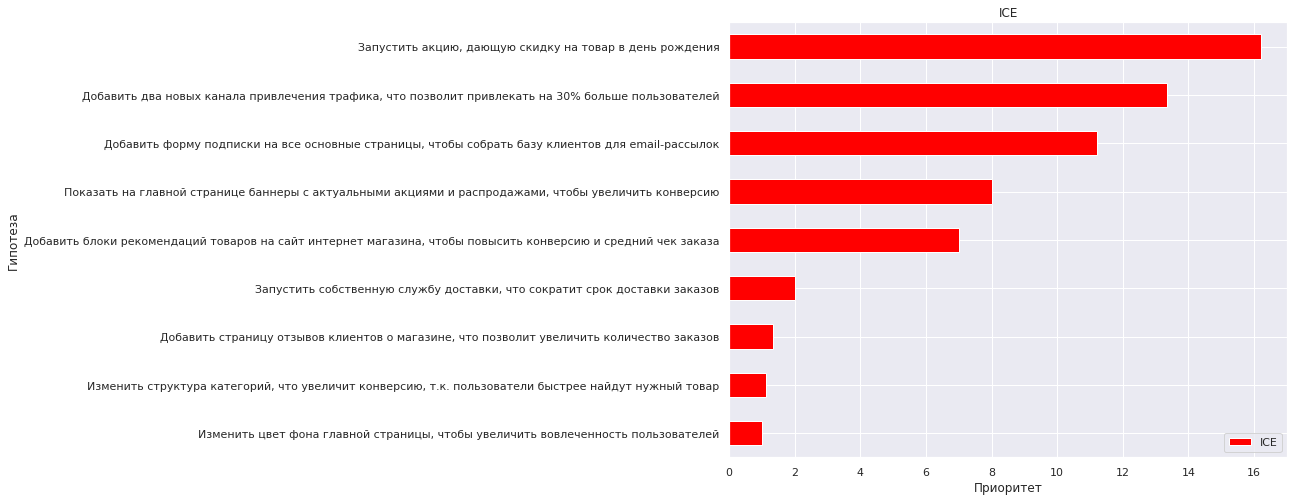

In [20]:
ax = hypothesis[['Hypothesis', 'ICE']].set_index('Hypothesis').sort_values('ICE', ascending=True).plot(kind='barh',color="red")
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

* ### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [21]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values('RICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20


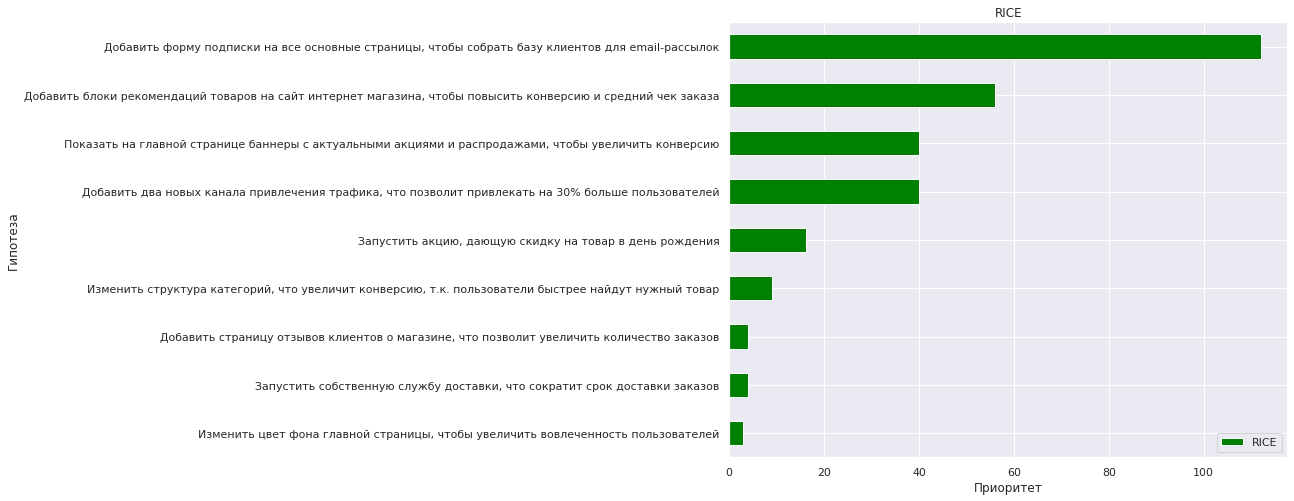

In [22]:
ax = hypothesis[['Hypothesis', 'RICE']].set_index('Hypothesis').sort_values('RICE', ascending=True).plot(kind='barh',color="green")
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

По ICE приоритет на стороне 8, 0 и 7 гипотез. По RICE лидеры 7, 2 и 0 гипотеза.

* ### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [23]:
hypothesis.sort_values(by='ICE', ascending=False, inplace=True)

hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


In [24]:
hypothesis.sort_values(by='RICE', ascending=False, inplace=True)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


Так произошло, потому, что формулы разные, одна учитывает охват, а другая — нет.

##  Анализ A/B-теста

###  Постройте график кумулятивной выручки по группам.

* Подготовим данные для построения графиков

In [25]:
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [26]:
# посчитаем сумму визитов по дням в каждой группе

visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])

# скопируем group чтобы провести по ней кумулятивную сумму

visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()

In [27]:
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])
cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']
cummulative.head()

,date,group,orders,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,24,20,148579,719,"6,190.79",0.03
1,2019-08-01,B,21,20,101217,713,"4,819.86",0.03
2,2019-08-02,A,44,39,242401,1338,"5,509.11",0.03
3,2019-08-02,B,45,43,266748,1294,"5,927.73",0.03
4,2019-08-03,A,68,63,354874,1845,"5,218.74",0.04


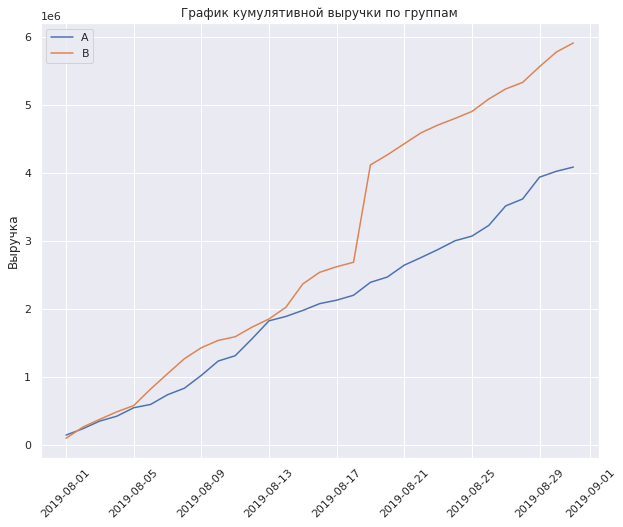

In [28]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Выручка растет почти равномерно.

В группе В менее линейный рост, что может свидетельствовать о наличии аномально дорогих заказов или роста количества покупок в отдельные даты.

### Постройте график кумулятивного среднего чека по группам.

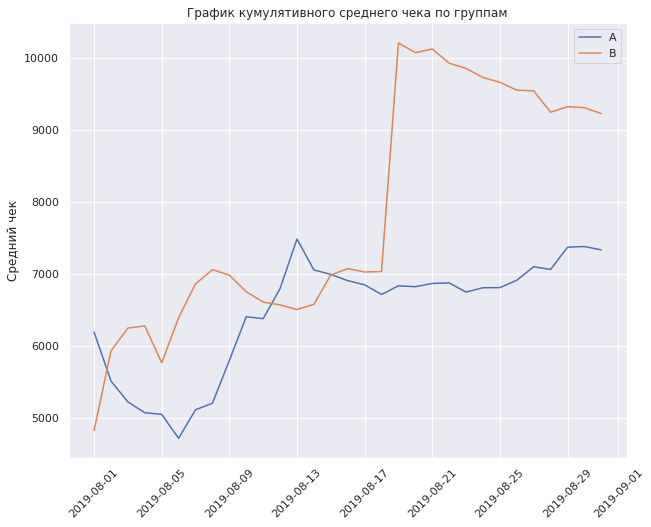

In [29]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'average_check']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'average_check']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Средний чек")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Покупки 18 числа в группе В сильно отразились на среднем чеке - средний чек вырос до 10000, после 19 числа начал падать, что также указывает на наличие отдельных выбросов в сумме или количестве заказов.

Средний чек группы А относительно стабилен около значения 7000.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. 

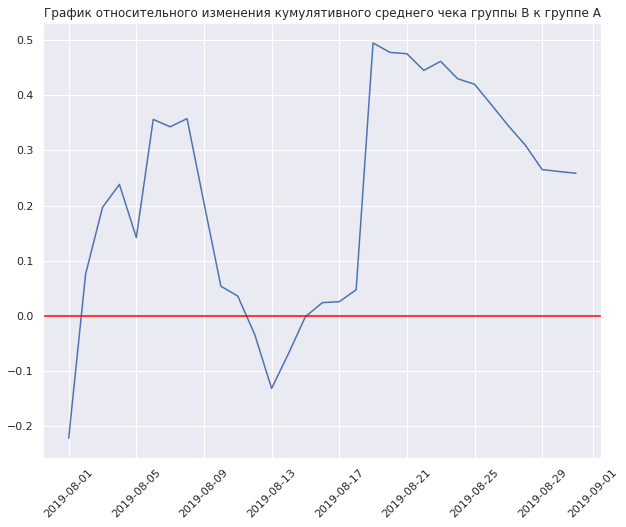

In [30]:
temp = (cummulativeA[['date', 'average_check']].merge(cummulativeB[['date', 'average_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(temp['date'], temp['average_check_B'] / temp['average_check_A']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45)
plt.show()

График сильно скачет на протяжении всего теста, после резкого скачка 18го числа преимущество группы В показывает нисходящий тренд.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам.

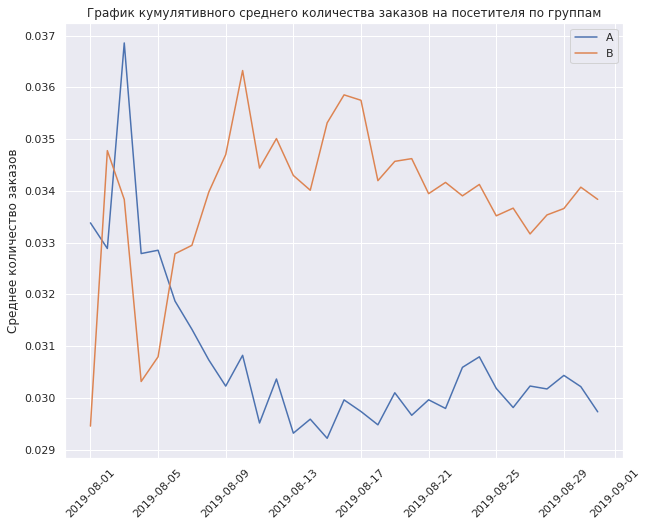

In [31]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel("Среднее количество заказов")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Графики кумулятивного среднего количества заказов на посетителя по группам относительно стабилизировались, и группа В показывает результат лучше примерно на 0.04%

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

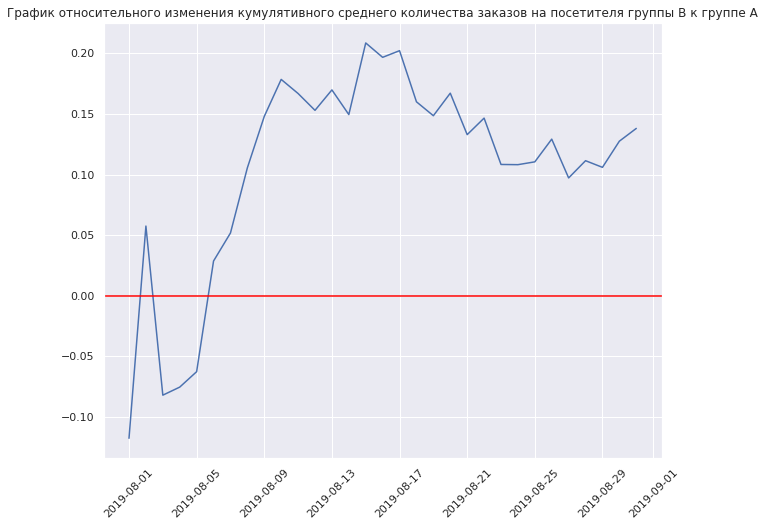

In [32]:
temp = (cummulativeA[['date', 'conversion']].merge(cummulativeB[['date', 'conversion']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(temp['date'], temp['conversion_B'] / temp['conversion_A']-1)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45)
plt.show()

Сначала количества заказов группе В отставала, затем с 8 числа установилась на уровне +10-20% от группы А.

### Постройте точечный график количества заказов по пользователям. 

In [33]:
orders_per_user = orders.groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})\
                         .rename(columns={'transactionid':'orders'})
orders_per_user.head()

,visitorid,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


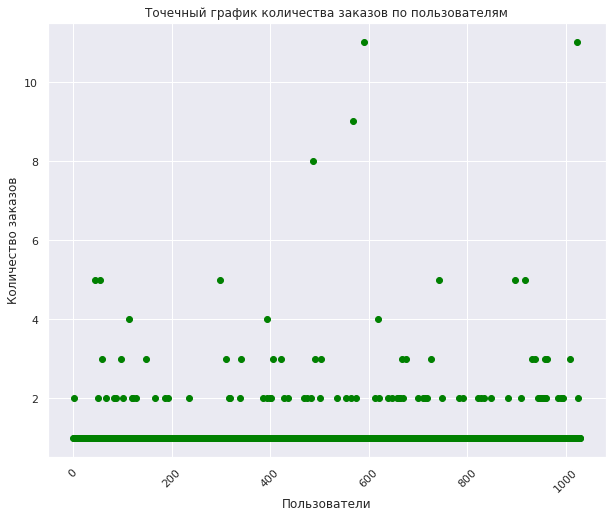

In [34]:
x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.scatter(x_values, orders_per_user['orders'], color='green')
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel("Пользователи")
plt.ylabel("Количество заказов")
plt.xticks(rotation=45)
plt.show()

Большинство пользователей сделали 1-2 заказа, но также есть и те, кто сделал более 10 заказов.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. 

In [35]:
np.percentile(orders_per_user['orders'], [95, 99])

array([2., 4.])

In [36]:
orders_per_user['orders'].max()

11

In [37]:
np.ptp(orders_per_user['orders'], axis=0)

10

In [38]:
outlaws_1p = orders_per_user[orders_per_user['orders'] >= 4]['visitorid'].to_list()

Не менее 95% пользователей сделали не более 2-х заказов, не менее 99% сделали не более 4-х. Будем считать аномалиями количество заказов больше 2-х.

### Постройте точечный график стоимостей заказов.

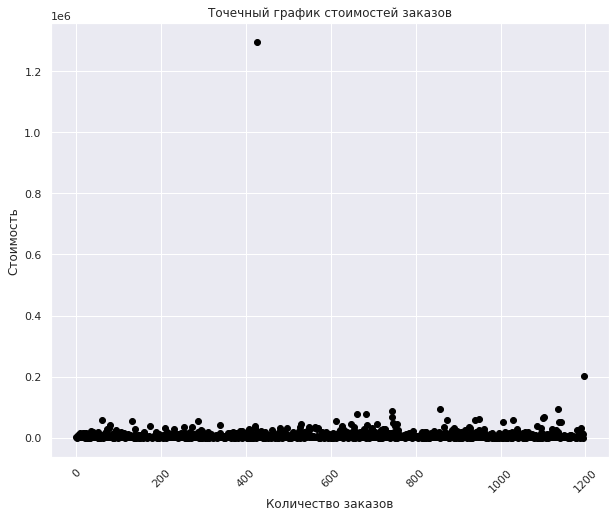

In [39]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='black')
plt.title('Точечный график стоимостей заказов')
plt.ylabel("Стоимость")
plt.xlabel("Количество заказов")
plt.xticks(rotation=45)
plt.show()

Исходя из графика, видно явно 2 выброса по стоимости заказа(Первый-это 1.2 млн, второй-200000)

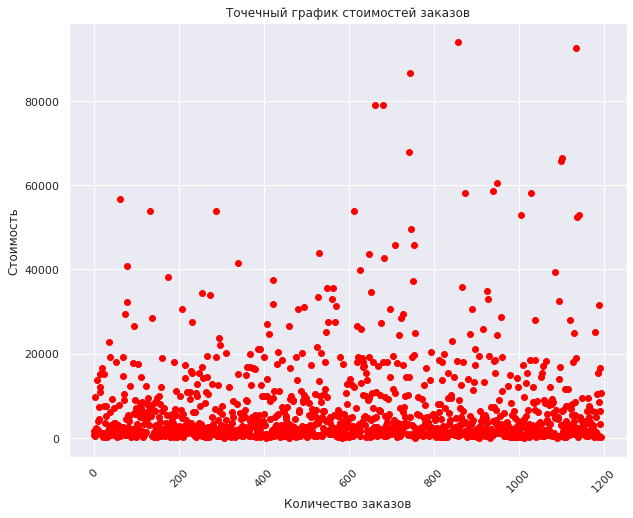

In [40]:
orders_r = orders.query('revenue<200000')
x_values = pd.Series(range(0,len(orders_r['revenue'])))
plt.scatter(x_values, orders_r['revenue'], color='red')
plt.title('Точечный график стоимостей заказов')
plt.ylabel("Стоимость")
plt.xlabel("Количество заказов")
plt.xticks(rotation=45)
plt.show()


Исходя из графика, видно, что стоимость по кол-вам заказам в основном до 20000.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. 

In [41]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

In [42]:
orders['revenue'].max()

1294500

In [43]:
np.ptp(orders['revenue'], axis=0)

1294450

Не менее 95% заказов были стоимостью до 28 000, не менее 99% до 58 200, будем считать аномальными заказы, не входящие в 95% перцентиль.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Будем использовать непараметрический тест Уилкоксона-Манна-Уитни, т.к. распределение не нормальное.

Создадим переменные orders_by_users_a и orders_by_users_b со столбцами ['user_id', 'orders'], где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов.

Объявим переменные sample_a и sample_b, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули.

Выведим p-value для сравнения среднего между группами. Округлим p-value до 5 знаков после запятой.

Вычислим и выведим относительное различие в среднем между группами. Округлим до 3 знаков после запятой.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

Установим критический уровень статистической значимости - 5%

In [44]:

# считаем количество пользователей по группам и дням

visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

data = (
    visitors_a_daily.merge(
        visitors_b_daily, left_on='date', right_on='date', how='left'))

data.head()

,date,visitors_per_date_a,visitors_per_date_b
0,2019-08-01,719,713
1,2019-08-02,619,581
2,2019-08-03,507,509
3,2019-08-04,717,770
4,2019-08-05,756,707


In [45]:
# создаем переменные orders_by_users_a и orders_by_users_b со столбцами ['user_id', 'orders'], 
# где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов

orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_users_b.columns = ['user_id', 'orders']

In [46]:
# создаем переменные sample_a и sample_b, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули.

sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)
sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)
     

In [47]:
# считаем p-value для сравнения среднего между группами

print('P-value:',"{0:.5f}".format(st.mannwhitneyu(sample_a, sample_b)[1]))

# считаем относительное различие в среднем между группами

print('Прирост',"{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

P-value: 0.01679
Прирост 0.138


Первое число — p-value = 0.01679 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет, отвергаем. Прирост количество заказов группы В относительно А примерно 13%.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 


Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Будем использовать непараметрический тест Уилкоксона-Манна-Уитни, т.к. распределение не нормальное.

Выведим p-value для сравнения среднего между группами. Округлим p-value до 3 знаков после запятой.

Вычислим и выведим для сравнения средних чеков между группами. Округлим до 3 знаков после запятой.

Сформулируем гипотезы. Нулевая: различий в среднем чеке между группами нет. Альтернативная: различия в среднем чеке между группами есть.

In [48]:
print('P-value:','{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Прирост','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
Прирост 0.259


Не можем отвергнуть Нулевую гипотезу, т.к. вероятность получить такие же или более экстремальные различия случайно более 5%.

Разница в среднем чеке между группами примерно 25% в пользу группы В.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Будем использовать непараметрический тест Уилкоксона-Манна-Уитни, т.к. распределение не нормальное.

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — users_with_many_orders и пользователей, совершивших заказы дороже 28 000 — users_with_expensive_orders. Объединим их в таблице abnormal_users. 

Узнаем, сколько всего аномальных пользователей атрибутом shape.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Подготовим выборки количества заказов по пользователям по группам теста.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [49]:
# делаем срез аномальных покупок по пользователям

users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 2]['user_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['user_id']
    ],
    axis=0
)

users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitorid']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates().sort_values()
)

print(abnormal_users.head(5))
print(abnormal_users.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


Всего 74 аномальных пользователей.

In [50]:
# отфильтровываем аномалии для группы А

sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))
        ]['orders'],
     
        pd.Series(
            0, 
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        )
    ],
    axis=0,
)

In [51]:
# отфильтровываем аномалии для группы В

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))
        ]['orders'],
     
        pd.Series(
            0, 
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        )
    ],
    axis=0,
)

In [52]:
# Применим статистический критерий Манна-Уитни к полученным выборкам

print('P-value:','{0:.3f}'.format(st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Прирост','{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

P-value: 0.013
Прирост 0.173


Как и в случае с сырыми данными - отвергаем Нулевую гипотезу, стат. значимые различия есть, здесь это более выраженно, вероятность случайно получить такие или более экстремальные различия всего 1,3%

Прирост количества заказов группы В относительно А оказался выше, чем в тесте с сырыми данными - примерно 17%

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Выведим p-value для сравнения средних чеков между очищенными группами. Округлим p-value до трёх знаков после запятой. Выведим относительный прирост среднего чека очищенной группы B, округлив до трёх знаков после запятой.

Сформулируем гипотезы. Нулевая: различий в  среднем чеке между группами нет. Альтернативная: различия в среднем чеке между группами есть.

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [53]:
# применяем тест Манна-Уитни к отфильтрованным данным

print('P-value:',
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Прирост:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.738
Прирост: -0.020


Не можем отвергнуть Нулевую гипотезу, как и при тестировании сырых данных, статистически значимых различий нет.

Разницы в среднем чеке между группами почти нет - 2% в пользу группы А.

### Примите решение по результатам теста и объясните его.

#### Вывод

В процессе предобработки были изучены данные и преобразованы для дальнешего корректного анализа.

При расчете были выявлены гипотезы с наибольшим приоритетом: "запуск акции, дающей скидку на товар в день рождения" и "добавление формы подписки на основных страницах".

По результатам теста принимаем решение остановить тест и зафиксировать победу группы В.

Обнаружены стат. значимые различия в количестве заказов  между группами, прирост консверсии в группе В относительно группы А составил около 17%.

Стат. значимых различий в среднем чеке не обнаружено, прирост среднего чека группы В также незначительный и составляет 2% над группой А

Это говорит о том, что, несмотря на то, что средний чек покупки не изменился, общее количество покупок выросло, следовательно выросла целевая метрика - выручка.